In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


df = pd.read_csv("Processed/merged_clean.csv")
display(df)


C:\Users\Cursist\AppData\Local\Temp\ipykernel_3676\129712693.py:12: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Processed/merged_clean.csv")


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,class,family,perishable,Price,store_name,city,state,type,cluster,transactions,dcoilwtico,description,transferred,total_sales
0,0,2013-01-01,25,103665,7.000,0,2712,BREAD/BAKERY,1,2.753766,Smart Bazaar,Sambalpur,Odisha,D,1,770.0,NaN,New Year's Day,Restricted Holiday,19.276365
1,60,2013-01-01,25,214381,5.000,0,3032,CLEANING,0,4.505188,Smart Bazaar,Sambalpur,Odisha,D,1,770.0,NaN,New Year's Day,Restricted Holiday,22.525938
2,120,2013-01-01,25,315179,4.000,0,1124,BEVERAGES,0,8.055946,Smart Bazaar,Sambalpur,Odisha,D,1,770.0,NaN,New Year's Day,Restricted Holiday,32.223783
3,180,2013-01-01,25,414752,1.000,0,1072,GROCERY I,0,7.725337,Smart Bazaar,Sambalpur,Odisha,D,1,770.0,NaN,New Year's Day,Restricted Holiday,7.725337
4,240,2013-01-01,25,557408,3.000,0,2142,DAIRY,1,6.212235,Smart Bazaar,Sambalpur,Odisha,D,1,770.0,NaN,New Year's Day,Restricted Holiday,18.636704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829930,48982440,2015-06-14,38,1464070,7.000,0,1190,BEVERAGES,0,6.941610,Smart Bazaar,Howrah,West Bengal,D,4,2366.0,NaN,NaN,NaN,48.591267
829931,48982500,2015-06-14,38,1473478,38.372,0,2012,PRODUCE,1,3.559966,Smart Bazaar,Howrah,West Bengal,D,4,2366.0,NaN,NaN,NaN,136.603004
829932,48982560,2015-06-14,38,1576326,1.000,0,5324,CELEBRATION,0,6.610750,Smart Bazaar,Howrah,West Bengal,D,4,2366.0,NaN,NaN,NaN,6.610750
829933,48982620,2015-06-14,38,1695813,9.000,0,2954,PREPARED FOODS,1,8.582336,Smart Bazaar,Howrah,West Bengal,D,4,2366.0,NaN,NaN,NaN,77.241025


In [ ]:
df = df[['date','type','cluster','transferred','total_sales']]

encoders = {}

# Encoding categorical variables
for column in ['type', 'cluster', 'transferred']:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder

# Splitting the dataset into features and target variable
X = df.drop('total_sales', axis=1)
y = df['total_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)


input_data = pd.DataFrame({
    'date': ['2013-01-01', 'F', 'M', 'F', 'M', 'M'],
    'type': ['Ph.D', 'Bachelor', 'Master', 'High School', 'Master', 'Master'],
    'cluster': ['Very good', 'Excellent', 'Good', 'Good', 'Very good', 'Pretty Bad']
    'transferred':[]
})

# Transform the input data using stored encoders
for column in ['Sex', 'Highest Degree', 'Interview Evaluation']:
    input_data[column] = encoders[column].transform(input_data[column])

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Processed/merged_clean.csv")
df = df.iloc[100:20000,][['date', 'type','cluster','transferred','total_sales']]
display(df)
# Data preprocessing
# Drop unnecessary columns
#df.drop(columns=["id", "date", "description", "transferred", "total_sales"], inplace=True)

# Handle missing values
df.fillna(0, inplace=True)

reference_date = datetime(2010, 1, 1)  # Adjust the reference date as per your data
df['date'] = (pd.to_datetime(df['date']) - reference_date).dt.days

# Encode categorical variables
label_encoders = {}
for column in ["type", "cluster", "transferred"]:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split data into features and target variable
X = df.drop(columns=["total_sales"])
y = df["total_sales"]

# Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Prediction for the future month
future_data = {
    "type": ["D"],
    "cluster": [13],
    "transferred": "Gazetted Holiday"
}

future_df = pd.DataFrame(future_data)
for column in ["type", "cluster", "transferred"]:
    future_df[column] = label_encoders[column].transform(future_df[column])

future_unit_sales = model.predict(future_df)
print("Predicted unit sales for the future month:", future_unit_sales[0])




C:\Users\Cursist\AppData\Local\Temp\ipykernel_3676\1056240161.py:8: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Processed/merged_clean.csv")


,type,cluster,transferred,total_sales
100,D,13,NaN,86.536140
101,D,13,NaN,20.536774
102,D,13,NaN,39.432342
103,D,13,NaN,90.344347
104,D,13,NaN,0.071804
...,...,...,...,...
19995,B,6,NaN,250.156339
19996,B,6,NaN,56.240744
19997,B,6,NaN,7.890494
19998,B,6,NaN,61.141011


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

C:\Users\Cursist\AppData\Local\Temp\ipykernel_3676\3871229328.py:11: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Processed/merged_clean.csv')


Predicted Total Sales for New Data: [ 46.14145502  46.14145502  46.14145502  54.88060405  54.88060405
  54.88060405  54.88060405  54.88060405  54.88060405  54.88060405
  54.88060405  54.88060405  54.88060405  54.88060405  54.88060405
  54.88060405 133.60062466 133.60062466 133.60062466 133.60062466
 133.60062466 133.60062466 133.60062466 133.60062466 133.60062466
 133.60062466 133.60062466 133.60062466 133.60062466 133.60062466
 133.60062466 133.60062466 133.60062466 133.60062466 133.60062466
 133.60062466 133.60062466 133.60062466 133.60062466  92.52301007
  92.52301007  92.52301007  92.52301007  92.52301007  92.52301007
  92.52301007  92.52301007  92.52301007  92.52301007  92.52301007
  92.52301007  92.52301007  92.52301007  92.52301007  92.52301007
  92.52301007  92.52301007  92.52301007  92.52301007  92.52301007
  92.52301007  92.52301007  93.00227903  93.00227903  93.00227903
  93.00227903  93.00227903  93.00227903  93.00227903  93.00227903
  93.00227903  93.00227903  93.00227903 

ValueError: x and y must have same first dimension, but have shapes (201000,) and (2123044,)

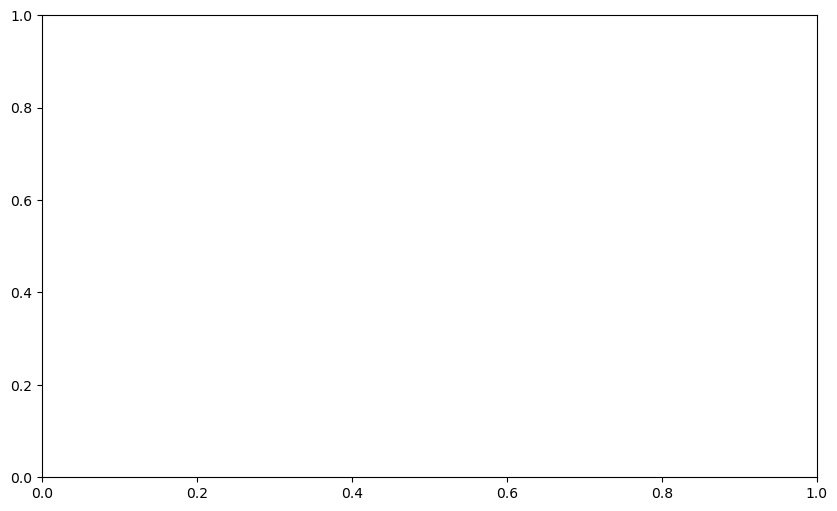

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from datetime import datetime
import matplotlib.pyplot as plt

# Load the entire dataset
data = pd.read_csv('Processed/merged_clean.csv')

# Convert date to a numerical representation (e.g., number of days since a reference date)
# You can choose a reference date based on your dataset
reference_date = datetime(2020, 1, 1)  # Adjust the reference date as per your data
data['date'] = (pd.to_datetime(data['date']) - reference_date).dt.days

# Encode categorical variables
categorical_features = ['type', 'cluster', 'transferred']
categorical_transformer = OneHotEncoder()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
train_data = data.iloc[:200000]
new_data = data.iloc[200000:201000]  # Next 10 lines for new data

X_train = train_data[['type', 'cluster', 'transferred', 'date']]
y_train = train_data['total_sales']
X_new = new_data[['type', 'cluster', 'transferred', 'date']]

# Preprocess training data
X_train = preprocessor.fit_transform(X_train)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict total sales for new data
X_new_processed = preprocessor.transform(X_new)
predicted_sales = model.predict(X_new_processed)
print("Predicted Total Sales for New Data:", predicted_sales)

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual total sales
plt.plot(data.iloc[:201000]['date'], data['total_sales'], label='Actual Total Sales', color='blue')

# Plot predicted total sales for new data
plt.scatter(new_data['date'], predicted_sales, label='Predicted Total Sales', color='red', marker='x')

plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales by Day with Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from datetime import datetime
import matplotlib.pyplot as plt

# Load the entire dataset
data = pd.read_csv('Processed/merged_clean.csv')

def list_values(series):
    return list(series.unique())

data = data.groupby('date').agg({
    'total_sales': 'sum', 
    'dcoilwtico': 'median',
    'transferred': list_values,
    'type': list_values
}).reset_index()

display(data)

C:\Users\Cursist\AppData\Local\Temp\ipykernel_15696\224230519.py:11: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Processed/merged_clean.csv')


,date,total_sales,dcoilwtico,transferred,type
0,2013-01-01,281.384690,NaN,[Restricted Holiday],[D]
1,2013-01-02,61027.219131,93.14,[nan],"[D, B, C, E, A]"
2,2013-01-03,46408.703473,92.97,[nan],"[D, B, C, E, A]"
3,2013-01-04,41268.117176,93.12,[nan],"[D, B, C, E, A]"
4,2013-01-05,62470.050970,NaN,[nan],"[D, B, C, E, A]"
...,...,...,...,...,...
1679,2017-08-11,134081.776852,48.81,[nan],"[D, B, C, E, A]"
1680,2017-08-12,92830.604442,NaN,[nan],"[D, B, C, E, A]"
1681,2017-08-13,105941.589095,NaN,[nan],"[D, B, C, E, A]"
1682,2017-08-14,116687.542837,47.59,[nan],"[D, B, C, E, A]"


In [34]:
from prophet import Prophet # https://facebook.github.io/prophet/docs/quick_start.html#python-api
df = data

# Prepare the data for Prophet
df['ds'] = pd.to_datetime(df['date'])
df['y'] = df['total_sales']

last_date = df['ds'].iloc[-1]

# Initialize Prophet model
m = Prophet()
m_h = Prophet()

m_h.add_country_holidays(country_name='IN')

# Fit the model
m.fit(df)
m_h.fit(df)

# Make a dataframe for future dates
future_dates = m.make_future_dataframe(periods=356)  # Predicting next 30 days
future_dates_h = m_h.make_future_dataframe(periods=356)  # Predicting next 30 days

# Make predictions
forecast = m.predict(future_dates)
forecast_h = m_h.predict(future_dates_h)


C:\Users\Cursist\AppData\Roaming\Python\Python311\site-packages\holidays\countries\india.py:99: Warning:

Diwali and Holi holidays available from 2001 to 2030 only

12:27:47 - cmdstanpy - INFO - Chain [1] start processing
12:27:48 - cmdstanpy - INFO - Chain [1] done processing
12:27:48 - cmdstanpy - INFO - Chain [1] start processing
12:27:48 - cmdstanpy - INFO - Chain [1] done processing


Figure(900x1200)


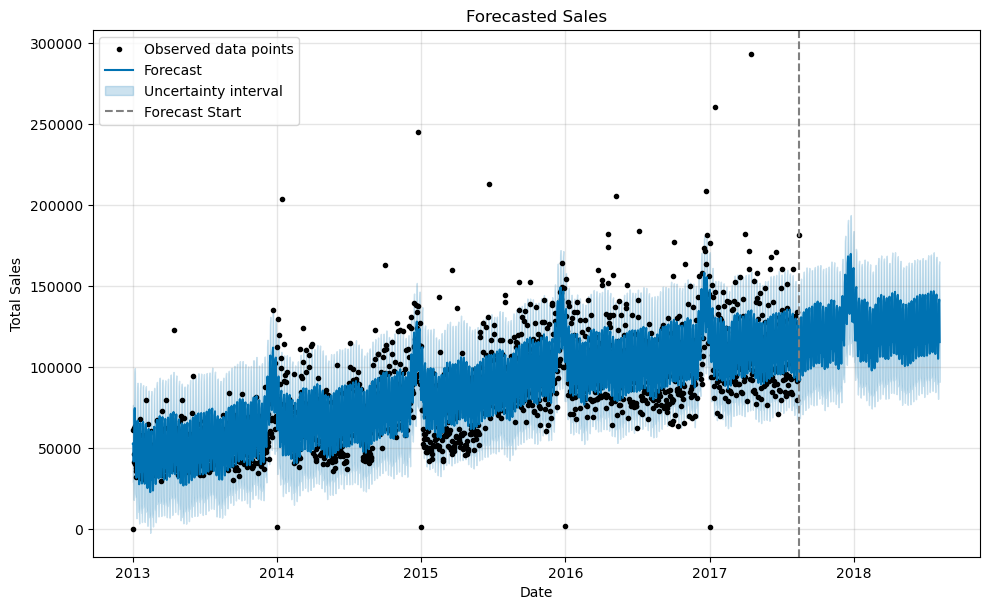

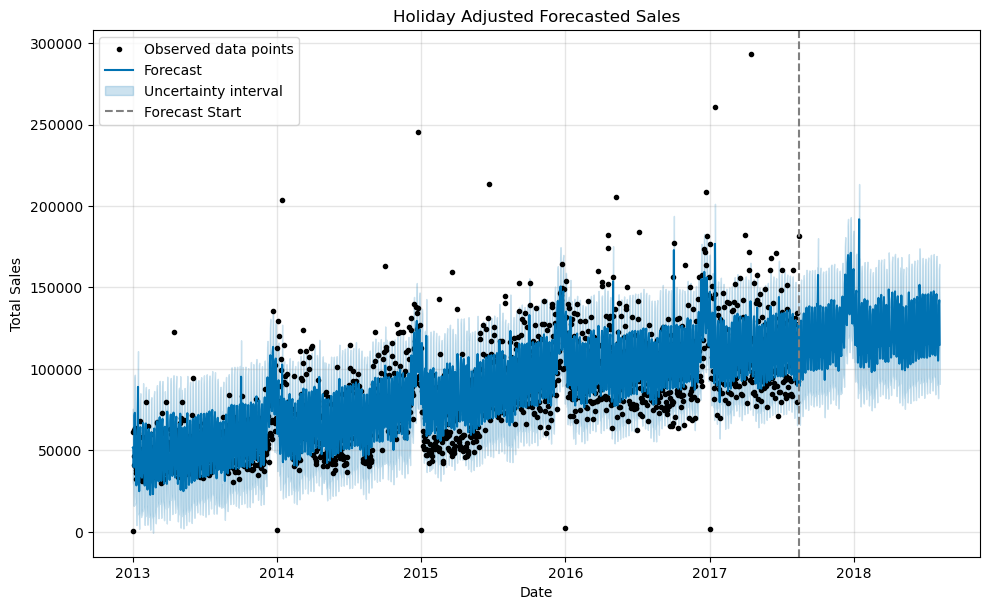

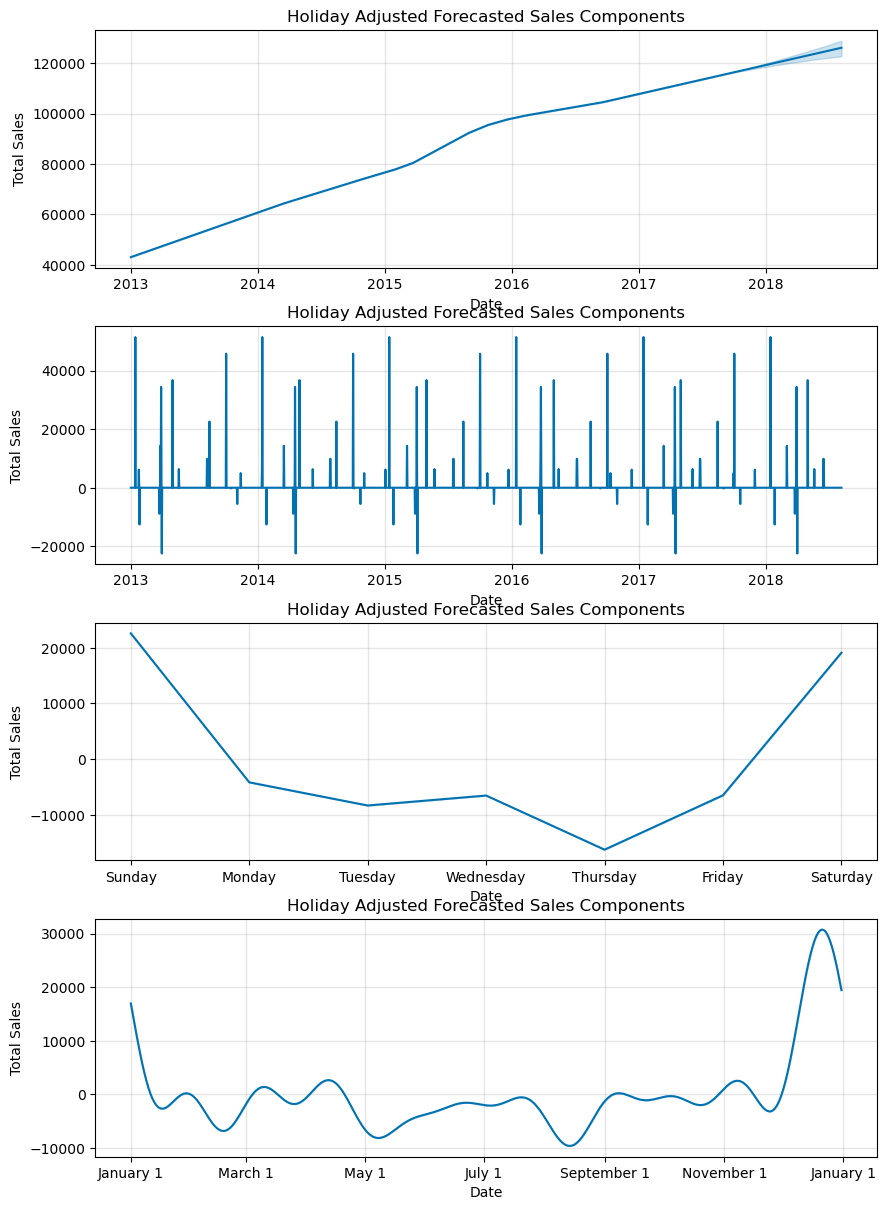

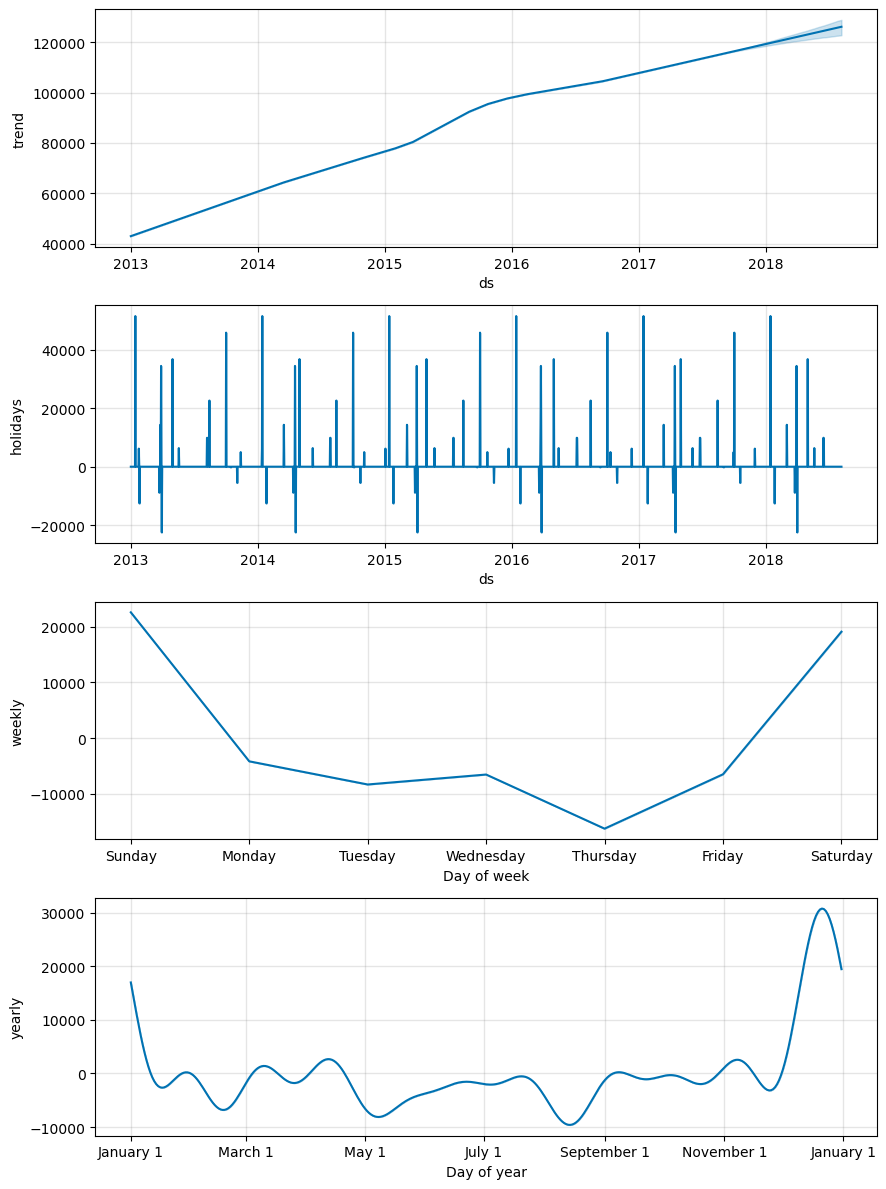

In [43]:
import matplotlib.pyplot as plt

# Plot the forecast
fig = m.plot(forecast)
figh = m_h.plot(forecast_h)
figch = m_h.plot_components(forecast_h)


# Plot a vertical line indicating where the forecast starts
forecast_start_date = last_date
for ax in fig.axes:
    ax.axvline(x=forecast_start_date, color='gray', linestyle='--', label='Forecast Start')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Sales')
    ax.set_title('Forecasted Sales')
    ax.legend()

for ax in figh.axes:
    ax.axvline(x=forecast_start_date, color='gray', linestyle='--', label='Forecast Start')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Sales')
    ax.set_title('Holiday Adjusted Forecasted Sales')
    ax.legend()


for ax in figch.axes:
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Sales')
    ax.set_title('Holiday Adjusted Forecasted Sales Components')


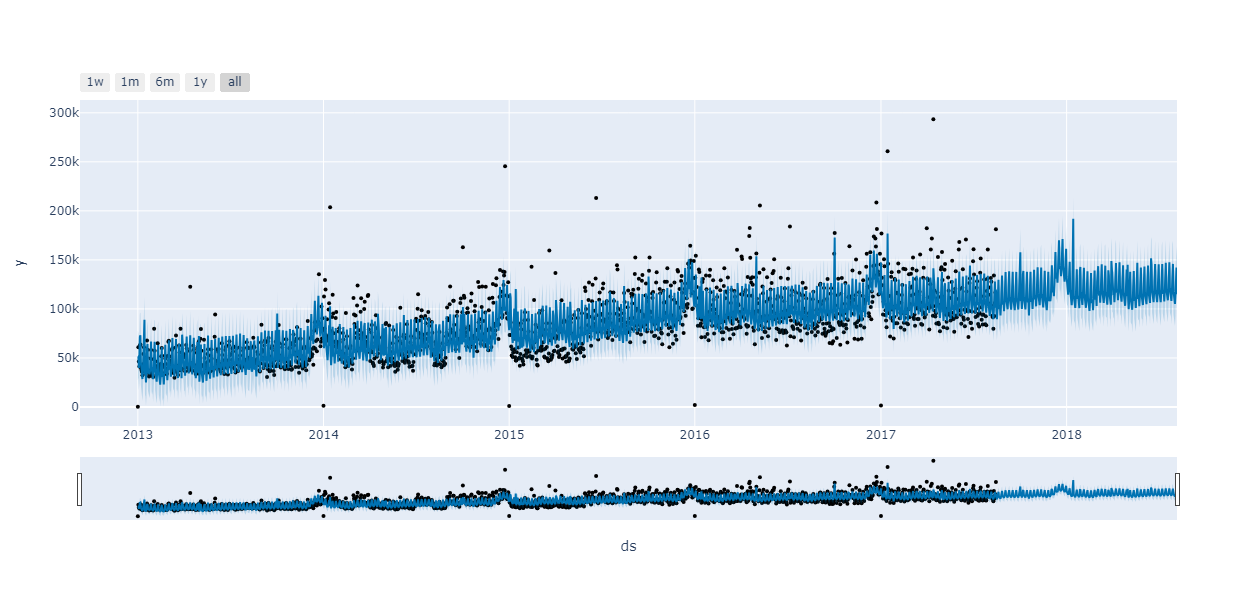

In [23]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m_h, forecast_h)


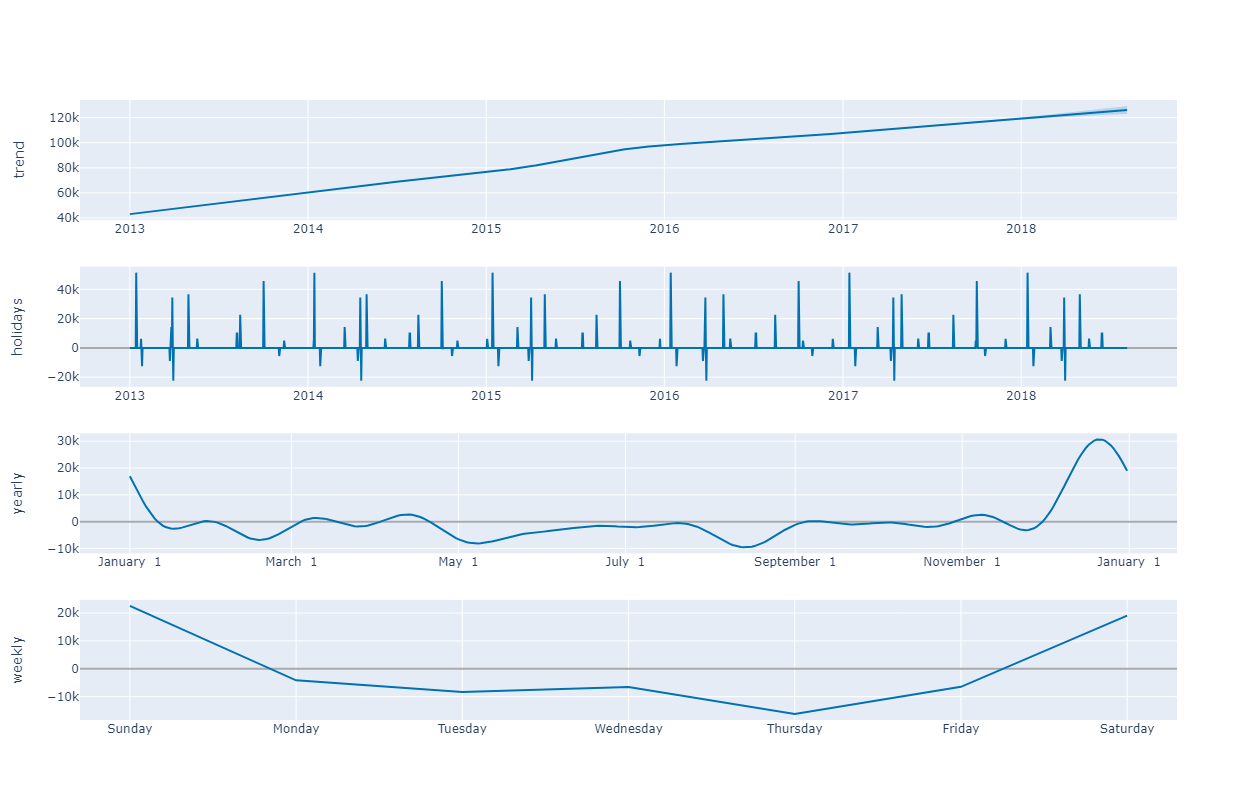

In [24]:
plot_components_plotly(m_h, forecast_h)

## Not every holiday is covered

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas Day', 'Christmas Day_lower', 'Christmas Day_upper',
       'Day of Ashura (estimated)', 'Day of Ashura (estimated)_lower',
       'Day of Ashura (estimated)_upper', 'Diwali', 'Diwali_lower',
       'Diwali_upper', 'Easter Sunday', 'Easter Sunday_lower',
       'Easter Sunday_upper', 'Eid al-Adha (estimated)',
       'Eid al-Adha (estimated)_lower', 'Eid al-Adha (estimated)_upper',
       'Eid ul-Fitr (estimated)', 'Eid ul-Fitr (estimated)_lower',
       'Eid ul-Fitr (estimated)_upper', 'Feast of Pentecost',
       'Feast of Pentecost_lower', 'Feast of Pentecost_upper',
       'Gandhi Jayanti', 'Gandhi Jayanti_lower', 'Gandhi Jayanti_upper',
       'Good Friday', 'Good Friday_lower', 'Good Friday_upper', 'Holi',
       'Holi_lower', 'Holi_upper', 'Independence Day',
       'Independence Day_lower', 'Independence Day_upper', 'Labour Day',
       'Labour Day_lower', 'Labour Day_upper', 'Makar

C:\Users\Cursist\AppData\Roaming\Python\Python311\site-packages\holidays\countries\india.py:99: Warning:

Diwali and Holi holidays available from 2001 to 2030 only

13:58:12 - cmdstanpy - INFO - Chain [1] start processing
13:58:12 - cmdstanpy - INFO - Chain [1] done processing


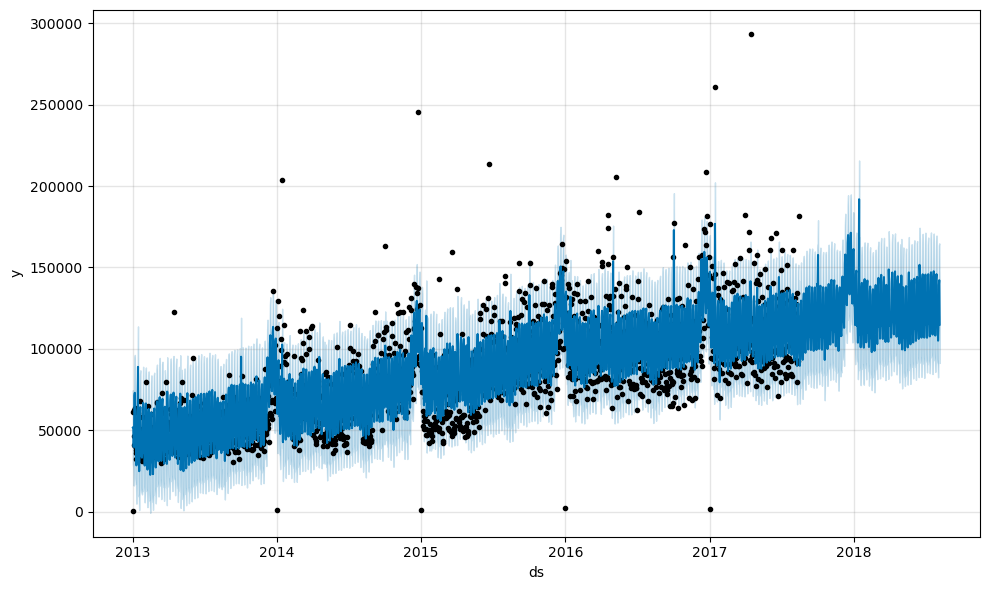

In [50]:
print(forecast_h.columns)

# May Day, december solstice, christmas eve, friendship day, new years eve
# maharishe valmiki, maha saptami, national day king bhumibol, beti bachao, new years day, new years day

# beti 22 January 2015
print(forecast.columns)


# Initialize Prophet model
model = Prophet()

model.add_country_holidays(country_name='IN')
#model.add_country_holidays(country_name='US')

# Fit the model
model.fit(df)

# Make a dataframe for future dates
future_dates = model.make_future_dataframe(periods=356)  # Predicting next 30 days


# Make predictions
forecast = model.predict(future_dates)
fig = m.plot(forecast)